# MNIST Database
###### Still not finished!!


This repository has been used as an introductory problem to Machine Learning, it is based on the book _Hands on Machine Learning_. I just added some comments and change some details of the code. 


This is obviously a classification problem so we have a set of features and a finite set of discrete labels as output.

---

We import some typical libraries, and we will also import more of them before the use. 

> We use the _warnings_ method, so as not to have some warnings regarding with future versions of scikit learn.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

We load the data

In [2]:
mnist = fetch_openml("mnist_784",version=1)

The datasets from scikit learn usually have a dictionary strucure, so we will be able to use the same syntax even if the _datatype_ is not that one

In [3]:
type(mnist)

sklearn.utils.Bunch

For instance, if one wants to know which are the possible _keys_,

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

We have here a matrix-like array $X$ of dimensions $Samples\times features$, and a vector-like array $y$ with the labels.

A description of the dataset is given on the key "DESCR"

In [5]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Let us rename these two variables, our feature set and the corresponding labels.

In [6]:
X,y = mnist["data"],mnist["target"]

Let us select a particular element so that we will understand better the structure of the data.

In [7]:
index=41968#np.random.randint(len(y))

As we have it random,

In [8]:
print(index)

41968


So we will save the set of fetarues and its expected output

In [9]:
Example=X[index]
res=y[index]

To visualize the data, we may first ask how it is saved,

In [10]:
print(np.shape(Example),type(Example),type(Example[0]))

(784,) <class 'numpy.ndarray'> <class 'numpy.float64'>


But we were expecting a set of _pictures_ of handwritten numbers as it says on the description, so let us reshape this array

In [11]:
Example_im=Example.reshape(28,28)

If we now plot this matrix-like array,

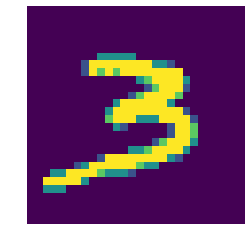

In [12]:
plt.imshow(Example_im)
plt.axis("off")
plt.show()

There you go, the pictures are saved as a 1 dimensional array!, now let us explore the labels

In [13]:
print(res,type(res))

3 <class 'str'>


We are not very interested on strings, so let us convert the complete array to int

In [14]:
y=y.astype(np.int)

In [15]:
len(y)

70000

As we want to train a model and then test how good it is, we may separate the data set on a training part and a test part. The test part is separated from the train data in order to see how good our model behaves on a data from _The same nature_, but without having  

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
print(np.shape(X_train),np.shape(X_test))

(56000, 784) (14000, 784)


In [19]:
y_train_3=(y_train==3)
y_test_3=(y_test==3)

# Stochastic Gradient Descent

As you will see later, changing between methods using SKLearn is extremely easy, so we just chose one (highly optimized) but it will make sense later. 

In [20]:
import sklearn.linear_model

In [21]:
print(dir(sklearn.linear_model))

['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'Hinge', 'Huber', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'Log', 'LogisticRegression', 'LogisticRegressionCV', 'ModifiedHuber', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveClassifier', 'PassiveAggressiveRegressor', 'Perceptron', 'RANSACRegressor', 'RandomizedLasso', 'RandomizedLogisticRegression', 'Ridge', 'RidgeCV', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SGDRegressor', 'SquaredLoss', 'TheilSenRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'bayes', 'cd_fast', 'coordinate_descent', 'enet_path', 'huber', 'lars_path', 'lasso_path', 'lasso_stability_path', 'least_angle', 'logistic', 'logistic_regression_path', '

So, we import our classifier

In [22]:
from sklearn.linear_model import SGDClassifier

And create it,

In [23]:
sgd_clf = SGDClassifier(random_state=3)

The training is as simple as, (This is why sklearn is so good, the syntax will be very similar no matter if we want clustering, classification, regression etc)

In [24]:
sgd_clf.fit(X_train,y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=3, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Let us make a small test, with the picture we plotted before

In [25]:
sgd_clf.predict([Example])

array([ True])

`True` means 3!!

In [26]:
res

'3'

## Cross Validation
One of the most powerfull tools sklearn has is the cross validation, I'll try to explain it very shallowly.

> How can we know that we choose a good training set?
>
> Is there any bias on the portion of the data we took?

To solve these issues, the cross validation repeats the complete training part for different training sets, there are different ways to do so, for example if we take the data in order, we may have that the training set is the first 80% and the test the last 20%, but we can repeat the procedure having the training as the last 80% and taking as test the first 20%, Which one is better?, in principle both are equivalent but the performance may be different, we can have different accuracy in both cases, so, which one shall we use?, it is common to choose the average!.



In [27]:
from sklearn.model_selection import cross_val_score

We perform the cross validation with the training data, so that the parameters on each case is different and tested.

I think we will spend a lot of time later on this topic, but it is important to get used to the terms and syntax!

In [28]:
cross_val_score(sgd_clf,X_train,y_train_3,cv=10,scoring="accuracy")

array([0.96054276, 0.96232816, 0.96678571, 0.95482143, 0.96696429,
       0.94892857, 0.95464286, 0.96285714, 0.96820861, 0.96035006])

In order to know how good is our model, we use a cross validation for the fitting, and then the prediction

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_3,cv=10)

## Confusion Matrix

It is important to know where are our mistakes, for example, as we are looking for 3's, we may distinguish if we predicted a 3 but it was different or if we predicted different but it was actually a 3, that may help us to understand better our model. This is basically the __confusion matrix__.

In [31]:
from sklearn.metrics import confusion_matrix

Let us plot and print it.

[[49888   420]
 [ 1784  3908]]


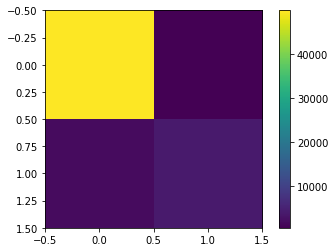

In [32]:
C_matrix=confusion_matrix(y_train_3,y_train_pred)
pl=plt.imshow(C_matrix)
plt.colorbar(pl)
print(C_matrix)

In [46]:
N,M=np.shape(C_matrix)
texts=["Predicted", " and It is"]
sol =["not 3","    3"]
for i in range(N):
    for j in range(M):
        print(texts[0]+' '+sol[i]+texts[1]+' '+sol[j]+" = ", C_matrix[i,j])

Predicted not 3 and It is not 3 =  49888
Predicted not 3 and It is     3 =  420
Predicted     3 and It is not 3 =  1784
Predicted     3 and It is     3 =  3908


So, it can be read as,

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-lboi{border-color:inherit;text-align:left;vertical-align:middle}
.tg .tg-0a7q{border-color:#000000;text-align:left;vertical-align:middle}
</style>
<table class="tg">
  <tr>
    <td class="tg-cly1" colspan="2" rowspan="2"></td>
    <td class="tg-lboi" colspan="2">Predicted</td>
  </tr>
  <tr>
    <td class="tg-0a7q">Negative</td>
    <td class="tg-0a7q">Positive</td>
  </tr>
  <tr>
    <td class="tg-0a7q" rowspan="2">Actual</td>
    <td class="tg-lboi">Negative</td>
    <td class="tg-lboi">TN</td>
    <td class="tg-lboi">FP</td>
  </tr>
  <tr>
    <td class="tg-lboi">Positive</td>
    <td class="tg-lboi">FN</td>
    <td class="tg-lboi">TP</td>
  </tr>
</table>


We now introduce some concepts, first how many positives where true positives
$$
\text{Precision}=\frac{TP}{TP+FP} 
$$

And how many positives from the total positives

$$
\text{Recall}=\frac{TP}{TP+FN} 
$$

One can calculate them, but SKLearn already have them implemented,

In [47]:
from sklearn.metrics import precision_score,recall_score

In [48]:
precision_score(y_train_3,y_train_pred)

0.9029574861367837

In [50]:
recall_score(y_train_3,y_train_pred)

0.6865776528460998

One would like to have them near to one, which would mean that all the positives are predicted as positive, and non negative is predicted as positive.

So a combination of them may be useful, thats called the _Harmonic mean_
$$
F_{1}=\frac{2}{\frac{1}{\text { precision }}+\frac{1}{\text { recall }}}=2 \times \frac{\text { precision } \times \text { recall }}{\text { precision }+\text { recall }}=\frac{T P}{T P+\frac{F N+F P}{2}}
$$

In [51]:
from sklearn.metrics import f1_score

In [54]:
f1_score(y_train_3,y_train_pred)

0.7800399201596806

Each of these predictions has its own precision (a percentage of certainty), so we can have that the output of a predictio is _True_ with a 60% of _confidence_ (This is a very important word that will have a clear meaning later). But 60% may not be good enough for us, that depends on the specific problem, so we can establish a threshold, and a _decision function_ that takes that threshold into account!.

In [53]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,method="decision_function")

Let us see how SKLearn do this for us!

In [55]:
from sklearn.metrics import precision_recall_curve

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

In [59]:
f1=2.0/((1./precisions)+(1./recalls))

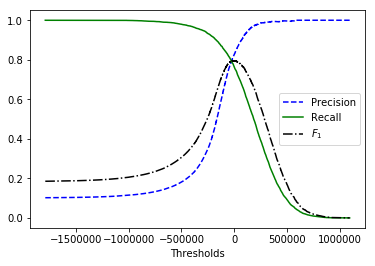

In [63]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, f1[:-1], "k-.", label="$F_1$")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

Which threshold shall we use, it is commonly plotted Precision vs Recalls, for example before the large fall $\text{recall} \approx 0.6$

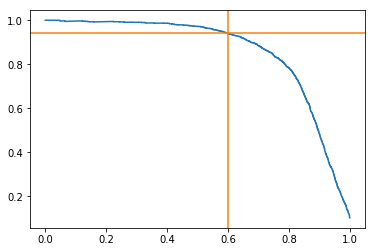

In [77]:
plt.plot(recalls,precisions)
plt.axvline(0.6,color="C1")
plt.axhline(precisions[np.where(np.abs(recalls-0.6)<0.0001)],color="C1")

In [78]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [79]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [81]:
precision_score(y_train_3, y_train_pred_90)

0.9000935891436593

In [83]:
recall_score(y_train_3, y_train_pred_90)

0.6758608573436402

# Multiclass Classification

In [84]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=3, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:

sgd_clf.predict([Example])

array([3])

In [86]:
Example_Scores=sgd_clf.decision_function([Example])

In [87]:
print(Example_Scores)

[[-514978.86067736 -361015.94655605 -347180.09198417  499866.76846105
  -560563.84901299 -347973.08968469 -604327.66799667 -314758.86222373
  -683785.11304191 -470148.61050415]]


In [88]:
np.argmax(Example_Scores)

3

In [90]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=10,scoring='accuracy')

array([0.91452534, 0.90986971, 0.9175    , 0.90964286, 0.91142857,
       0.9125    , 0.91035714, 0.90910714, 0.91336191, 0.90616622])

In [96]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [97]:
C_matrix=confusion_matrix(y_train,y_train_pred)

In [98]:
C_matrix

array([[5375,    1,   15,    9,   10,   38,   42,    9,   39,    4],
       [   1, 6012,   39,   27,    5,   45,    7,   10,  118,    6],
       [  49,   29, 5003,   93,   82,   25,   78,   58,  178,   16],
       [  43,   34,  116, 4980,    3,  222,   32,   49,  137,   76],
       [  16,   22,   33,    8, 5052,    8,   42,   28,   83,  186],
       [  61,   29,   29,  180,   65, 4311,   99,   38,  171,   85],
       [  32,   21,   49,    2,   40,   92, 5204,    4,   36,    2],
       [  21,   24,   63,   34,   51,   10,    4, 5403,   17,  212],
       [  40,  119,   68,  147,   19,  143,   45,   25, 4746,  117],
       [  50,   29,   20,   76,  142,   37,    3,  189,   83, 4920]],
      dtype=int64)

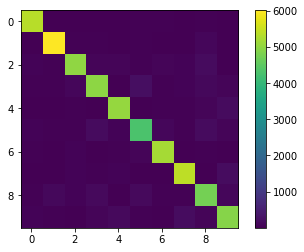

In [107]:
pl=plt.imshow(C_matrix)
plt.colorbar(pl)
plt.show()

In [103]:
row_sums = C_matrix.sum(axis=1, keepdims=True)

In [109]:
norm_conf_mx = C_matrix / row_sums

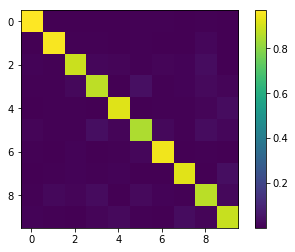

In [111]:
pl=plt.imshow(norm_conf_mx)
plt.colorbar(pl)
plt.show()

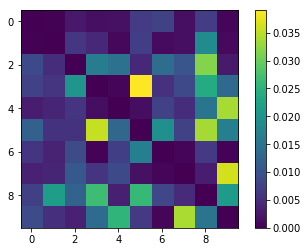

In [113]:
np.fill_diagonal(norm_conf_mx, 0)
pl=plt.imshow(norm_conf_mx)
plt.colorbar(pl)
plt.show()

In [205]:
def plot_digits(data,images_per_row,fig):

    for i in range(images_per_row):
        for j in range(images_per_row):
            test=data[5*i+j].reshape(28,28)
            ax=fig.add_subplot(5,5,5*i+j+1)
            ax.set_axis_off()
            ax.imshow(test)
    plt.show()

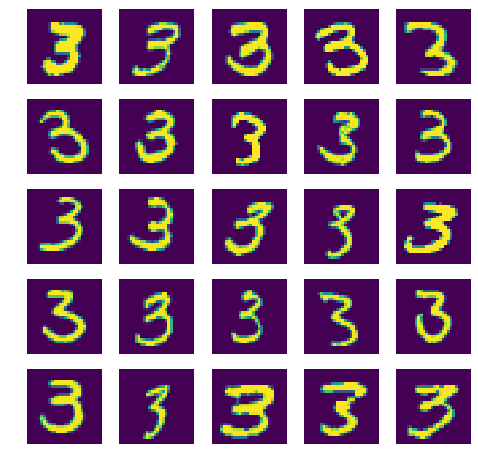

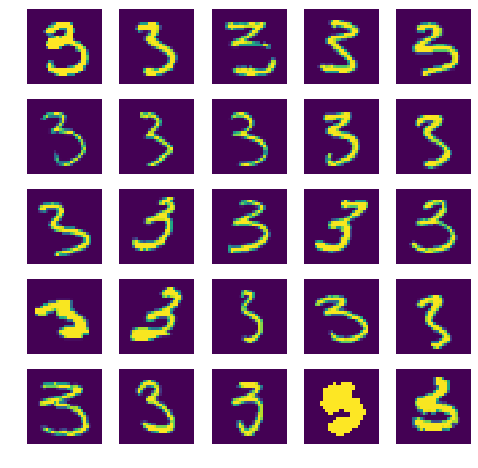

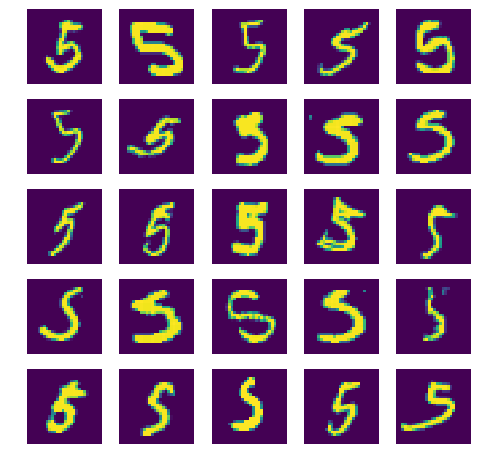

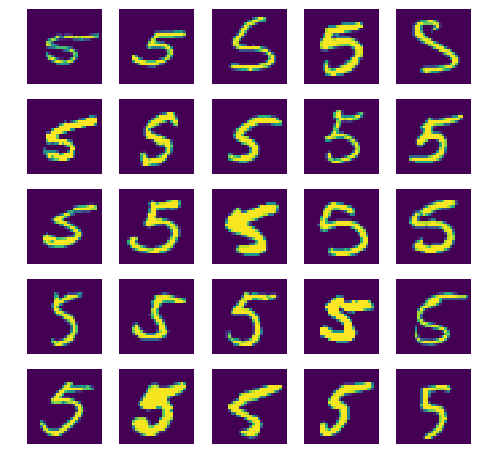

In [206]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

for data in [X_aa[:25],X_ab[:25],X_ba[:25],X_bb[:25]]:

    fig=plt.figure(figsize=(8,8))
    plot_digits(data,5,fig)